In [1]:
!pip install pip uproot awkward --upgrade

Defaulting to user installation because normal site-packages is not writeable


In [2]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

# Signal study of VLQ VBHb (Hyy) job options

This document shows the job options for the VLQ VBHb signals (where V denotes either W or Z).
The job options employ MadGraph matrix element reweighting.
The plots show in blue the nominal signal and overlaid the reweighted distributions for different configurations of the VLQ coupling kappa and the mass.

The plots show both the coupling reweighting and the mass reweighting.
For each mass point, both ZBHb and WBHb signals are produced. Two different nominal coupling values, kappa=0.40 and kappa=1.00 are produced to improve the mass reweighting for a narrow width and larger width scenario.

The distributions show max m(H, b) for the Higgs boson and possible b-quarks not originating from the Higgs boson decay, which is a proxy for the VLQ mass.

The signals include only the decay mode of the Higgs boson to photons.

In [3]:
import uproot
import numpy as np
import matplotlib.pyplot as plt
import mplhep as hep

In [4]:
plt.style.use(hep.style.ATLAS)

In [5]:
def plotDistribution(input_file, weight_dict, tree='truth', distribution='m_Hb_max', nominal_label='', logy=False, nbins=52, nrange=(0.,2600), closure_files=None):
    f = uproot.open(input_file)
    t = f[tree]

    dist = t[distribution].array()
    distribution_label = distribution
    if distribution == 'm_Hb_max':
        dist = dist * 0.001 # mass in GeV
        distribution_label += ' [GeV]'

    nominal_weight = t[f'generatorWeight_GEN_Default'].array()
    weights = {}
    for weight in weight_dict.keys():
        weights[weight] = t[f'generatorWeight_GEN_{weight}'].array()

    # plot mtt with weights
    fig, ax = plt.subplots()
    # nominal weight
    h, bins = np.histogram(dist, weights=nominal_weight, bins=nbins, range=nrange)
    hep.histplot(h, bins, label='nominal ' + nominal_label, color='blue')
    # reweighted distributions
    for name, w in weights.items():
        h, bins = np.histogram(dist, weights=w, bins=nbins, range=nrange)
        hep.histplot(h, bins, color=weight_dict[name], label=name + ' (rw)')
    # closure check
    if closure_files: addClosure(closure_files, tree=tree, distribution=distribution, nbins=nbins, nrange=nrange)
    if logy: ax.set_yscale('log')
    ax.set_xlabel(distribution)
    ax.set_ylabel('Events')
    plt.legend()
    plt.tight_layout()
    return fig, ax

## mVLQ = 1 TeV mass point

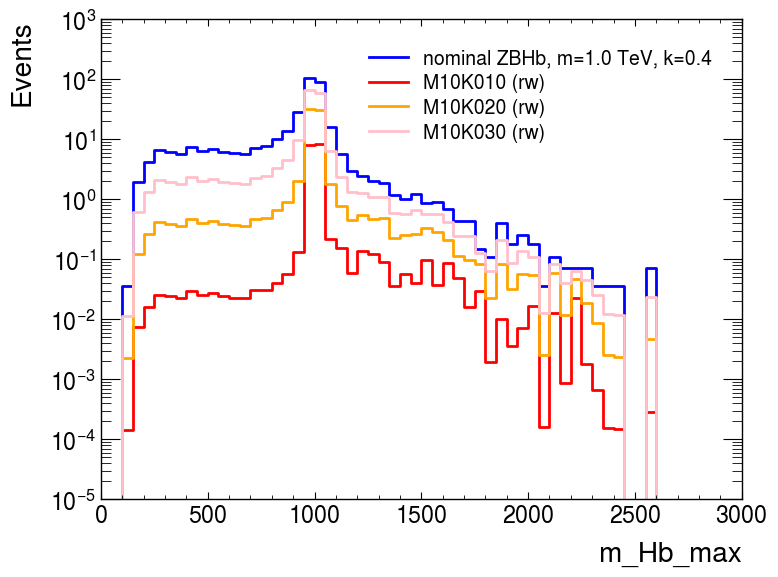

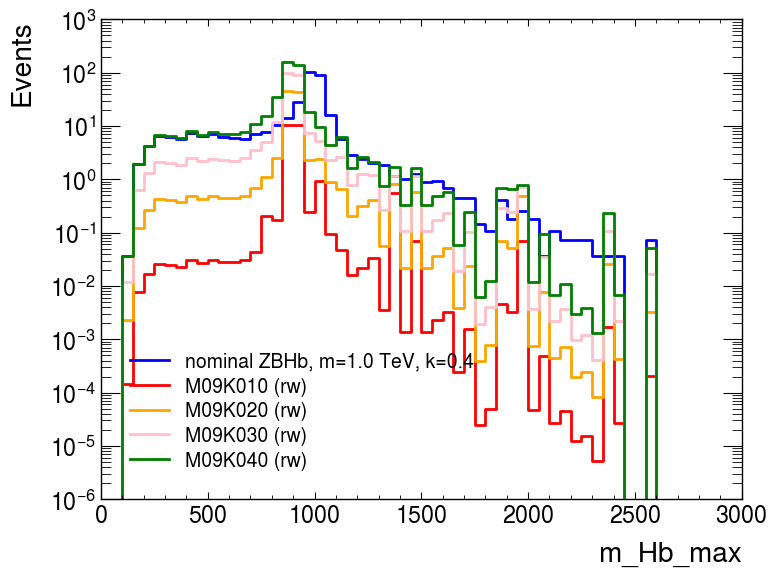

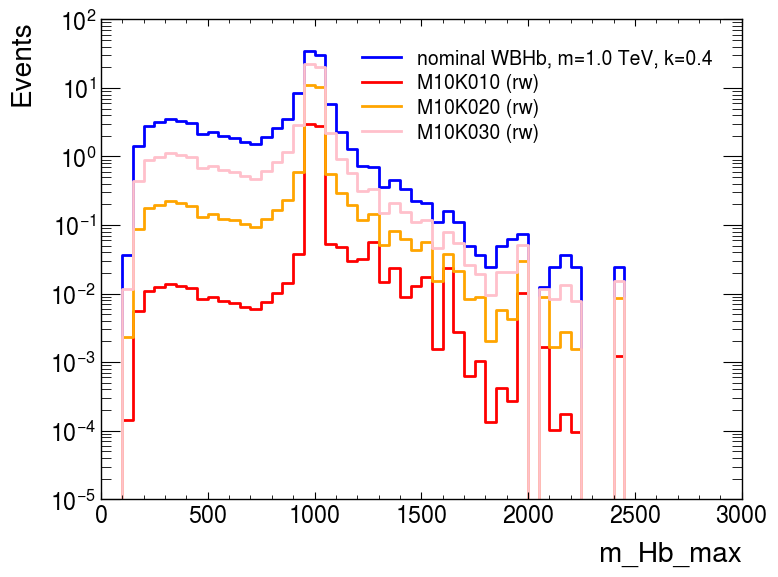

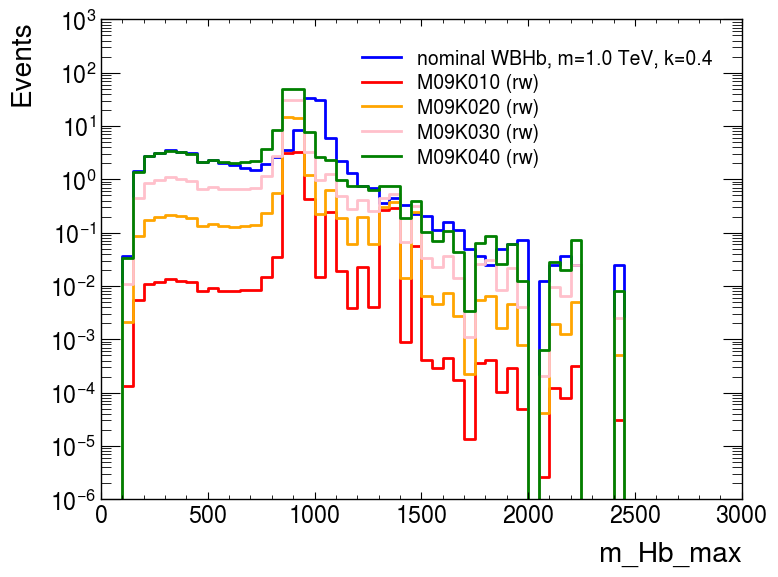

In [6]:
input_files = ['data/108000.root', 'data/108016.root']
nominal_labels = [p + ', m=1.0 TeV, k=0.4' for p in ['ZBHb', 'WBHb']]
weights_coupling = {
    'M10K010': 'red',
    'M10K020': 'orange',
    'M10K030': 'pink',
}
weights_mass = {
    'M09K010': 'red',
    'M09K020': 'orange',
    'M09K030': 'pink',
    'M09K040': 'green',
}
for input_file, nominal_label in zip(input_files, nominal_labels):
    for weights in [weights_coupling, weights_mass]:
        fig, ax = plotDistribution(input_file, weights, nominal_label=nominal_label, logy=True)

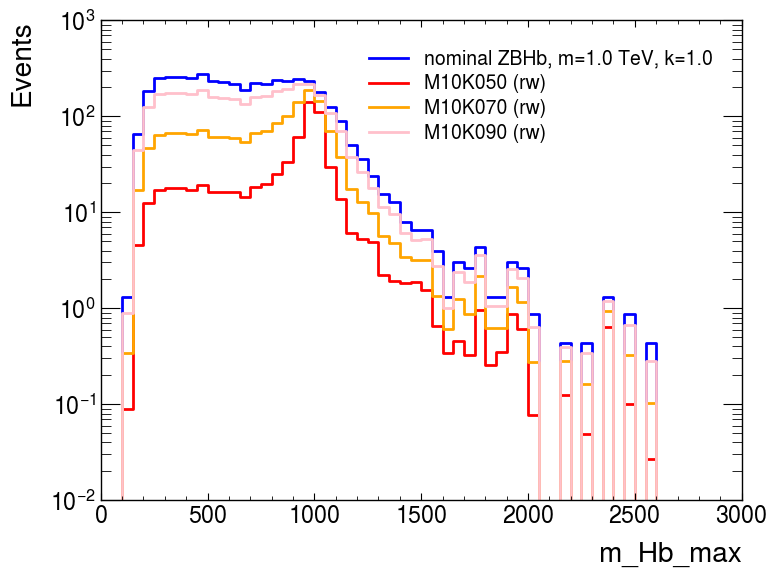

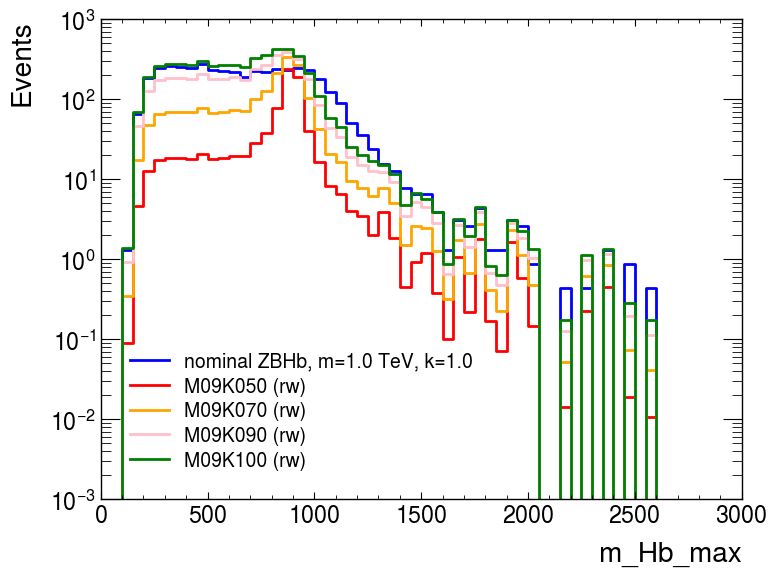

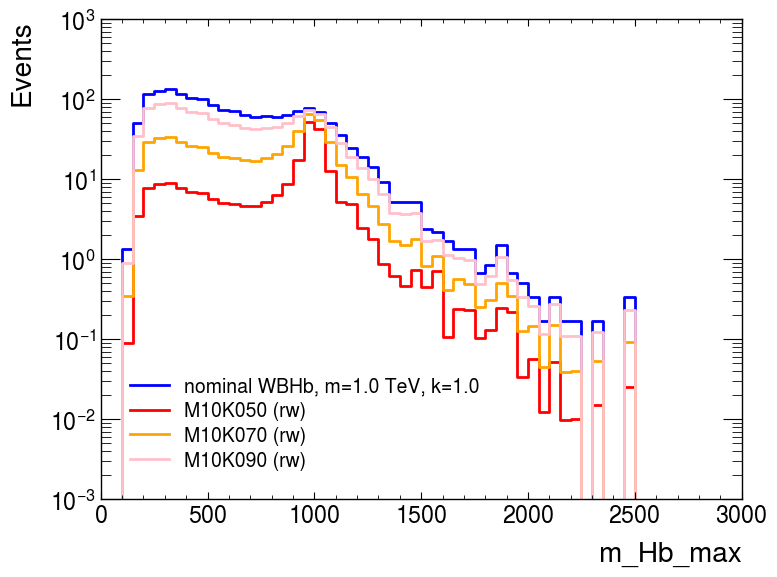

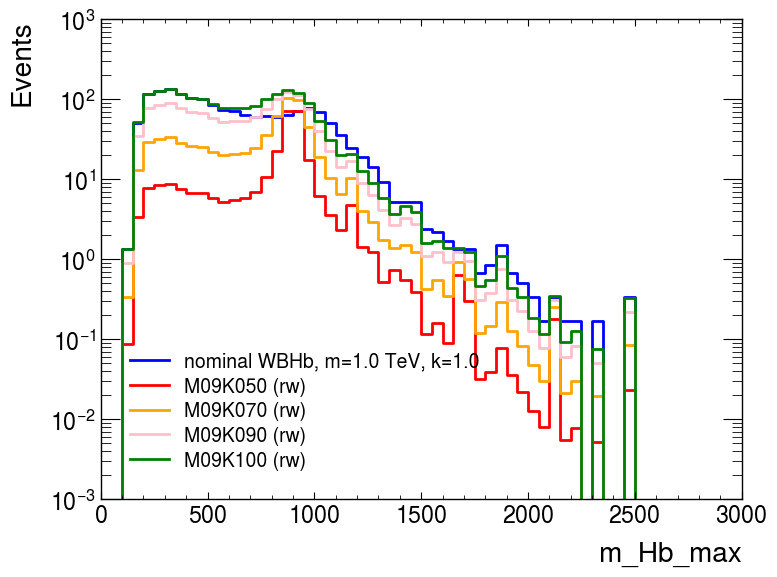

In [7]:
input_files = ['data/108001.root', 'data/108017.root']
nominal_labels = [p + ', m=1.0 TeV, k=1.0' for p in ['ZBHb', 'WBHb']]
weights_coupling = {
    'M10K050': 'red',
    'M10K070': 'orange',
    'M10K090': 'pink',
}
weights_mass = {
    'M09K050': 'red',
    'M09K070': 'orange',
    'M09K090': 'pink',
    'M09K100': 'green',
}
for input_file, nominal_label in zip(input_files, nominal_labels):
    for weights in [weights_coupling, weights_mass]:
        fig, ax = plotDistribution(input_file, weights, nominal_label=nominal_label, logy=True)

## mVLQ = 1.2 TeV mass point

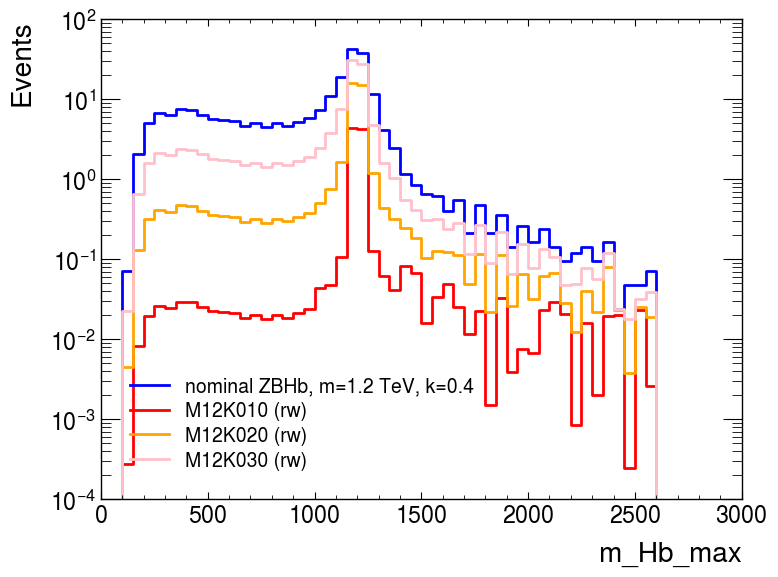

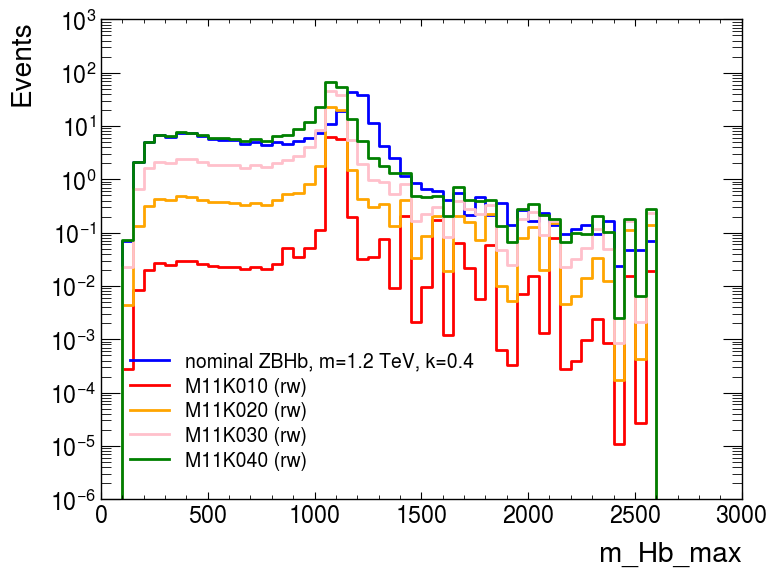

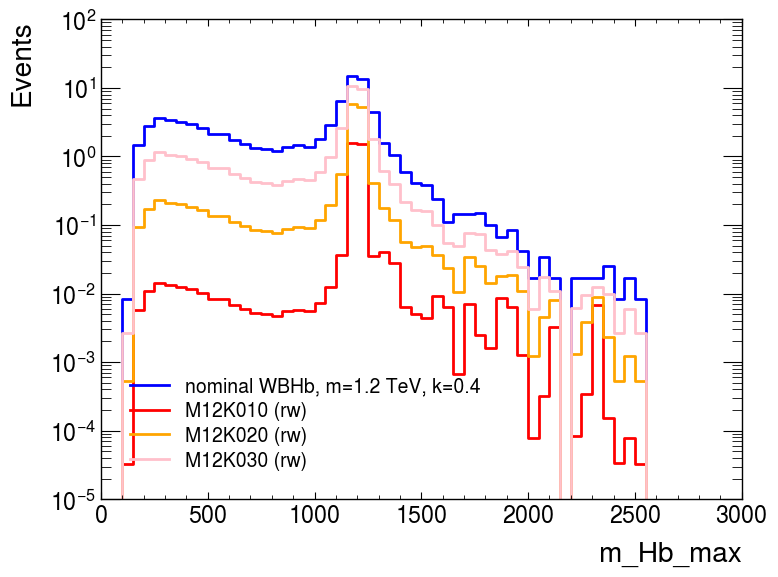

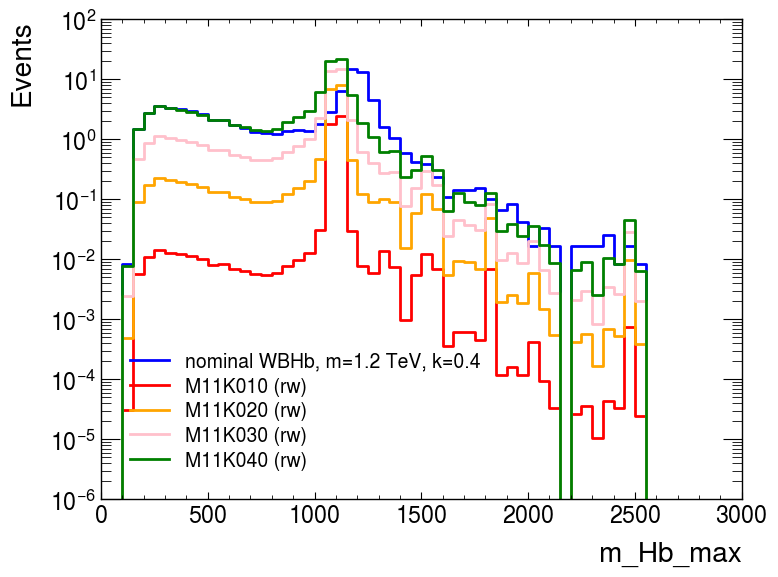

In [8]:
input_files = ['data/108002.root', 'data/108018.root']
nominal_labels = [p + ', m=1.2 TeV, k=0.4' for p in ['ZBHb', 'WBHb']]
weights_coupling = {
    'M12K010': 'red',
    'M12K020': 'orange',
    'M12K030': 'pink',
}
weights_mass = {
    'M11K010': 'red',
    'M11K020': 'orange',
    'M11K030': 'pink',
    'M11K040': 'green',
}
for input_file, nominal_label in zip(input_files, nominal_labels):
    for weights in [weights_coupling, weights_mass]:
        fig, ax = plotDistribution(input_file, weights, nominal_label=nominal_label, logy=True)

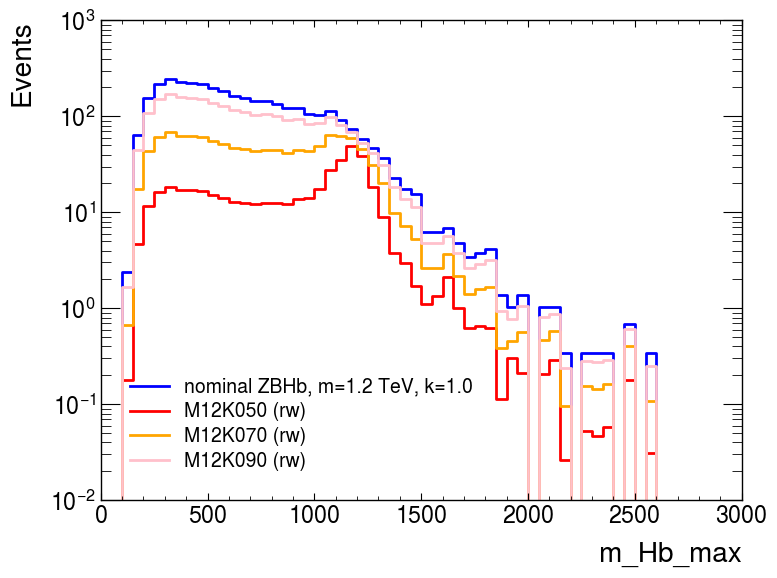

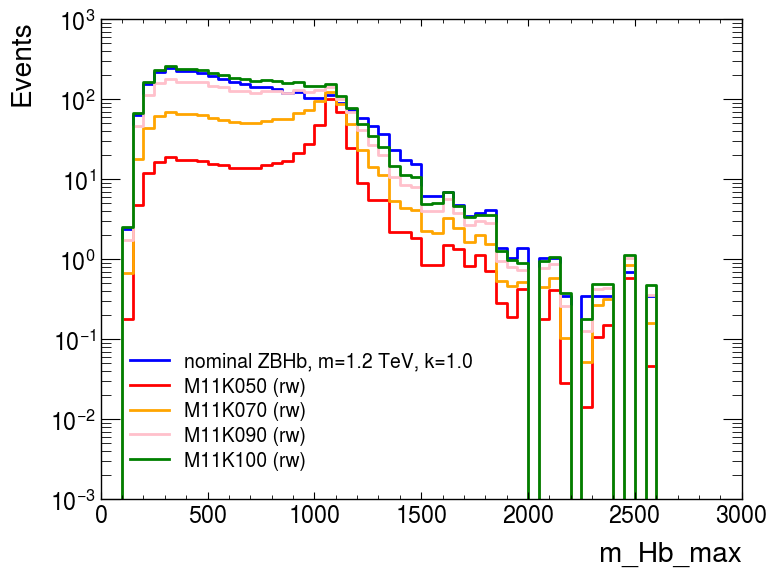

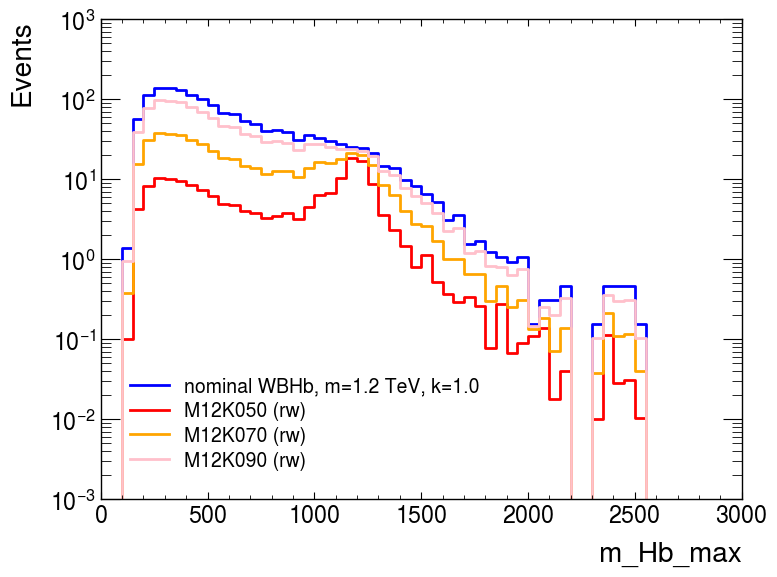

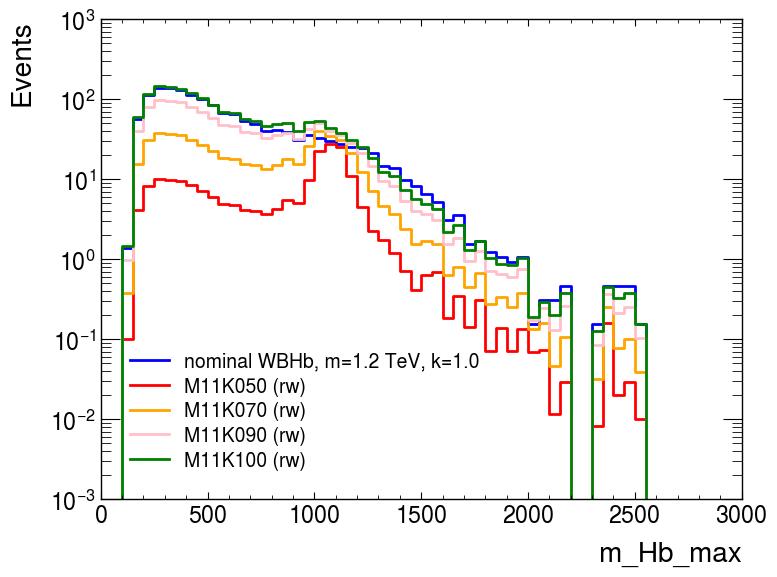

In [9]:
input_files = ['data/108003.root', 'data/108019.root']
nominal_labels = [p + ', m=1.2 TeV, k=1.0' for p in ['ZBHb', 'WBHb']]
weights_coupling = {
    'M12K050': 'red',
    'M12K070': 'orange',
    'M12K090': 'pink',
}
weights_mass = {
    'M11K050': 'red',
    'M11K070': 'orange',
    'M11K090': 'pink',
    'M11K100': 'green',
}
for input_file, nominal_label in zip(input_files, nominal_labels):
    for weights in [weights_coupling, weights_mass]:
        fig, ax = plotDistribution(input_file, weights, nominal_label=nominal_label, logy=True)

## mVLQ = 1.4 TeV mass point

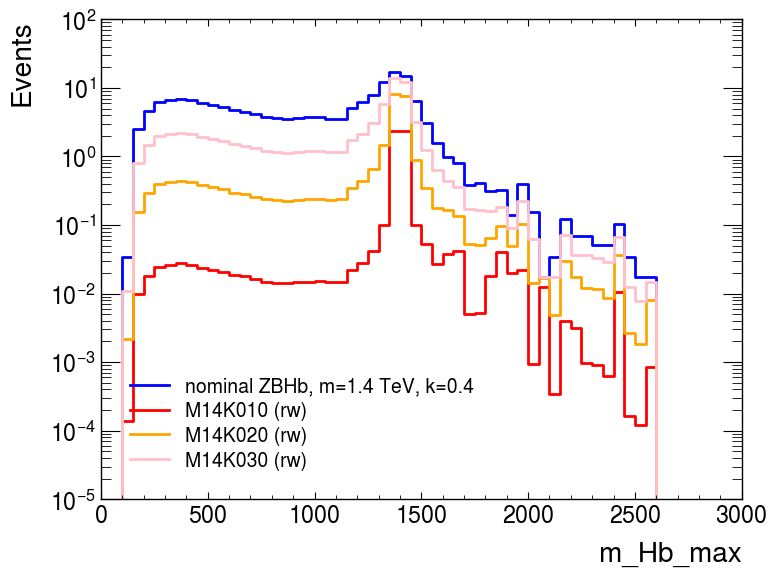

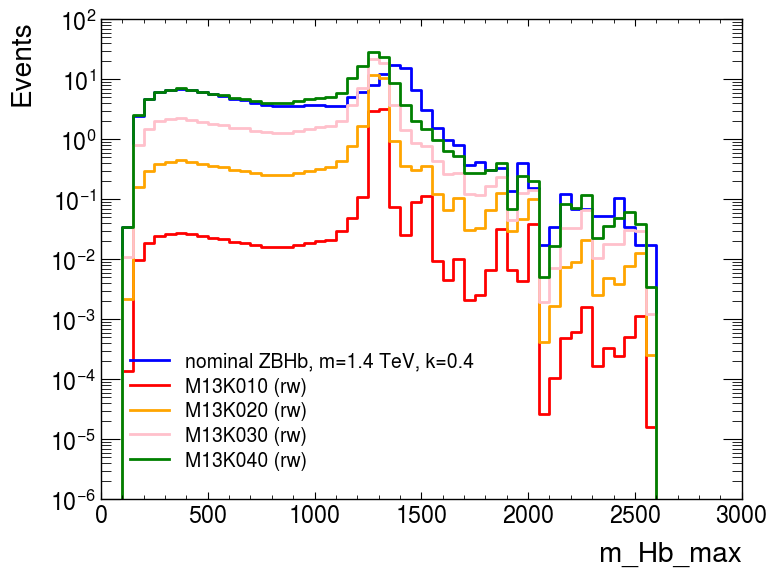

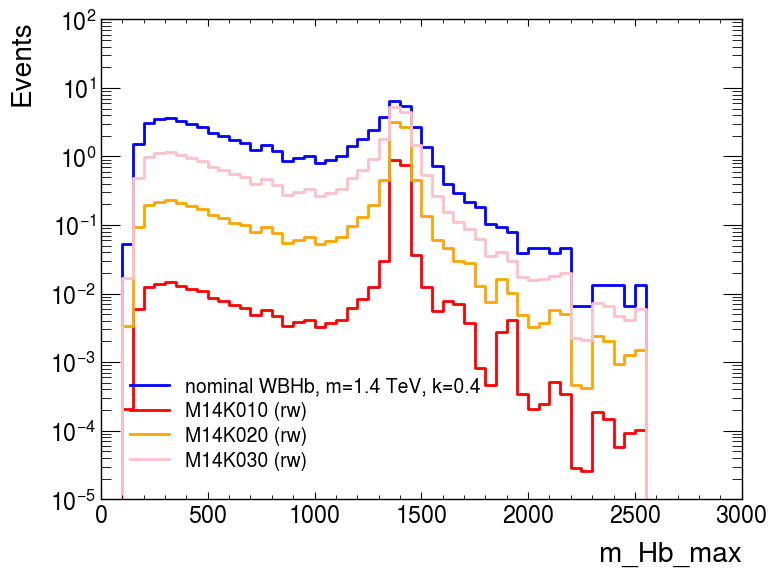

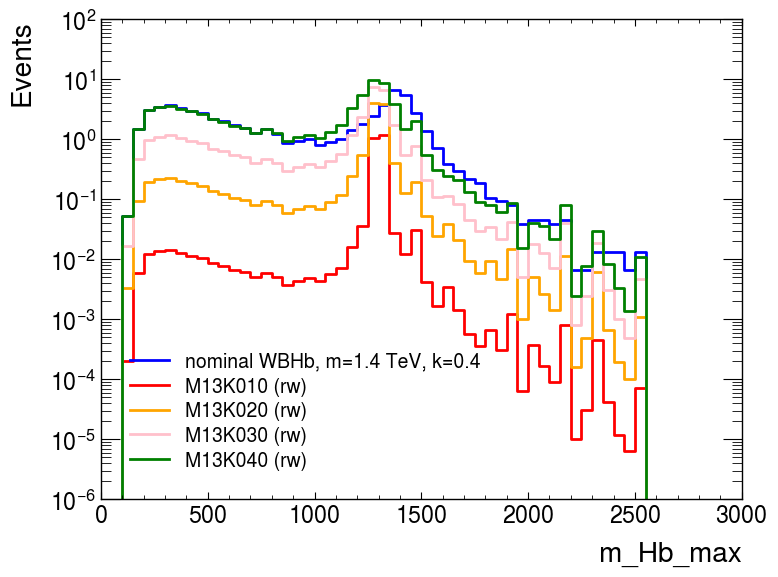

In [10]:
input_files = ['data/108004.root', 'data/108020.root']
nominal_labels = [p + ', m=1.4 TeV, k=0.4' for p in ['ZBHb', 'WBHb']]
weights_coupling = {
    'M14K010': 'red',
    'M14K020': 'orange',
    'M14K030': 'pink',
}
weights_mass = {
    'M13K010': 'red',
    'M13K020': 'orange',
    'M13K030': 'pink',
    'M13K040': 'green',
}
for input_file, nominal_label in zip(input_files, nominal_labels):
    for weights in [weights_coupling, weights_mass]:
        fig, ax = plotDistribution(input_file, weights, nominal_label=nominal_label, logy=True)

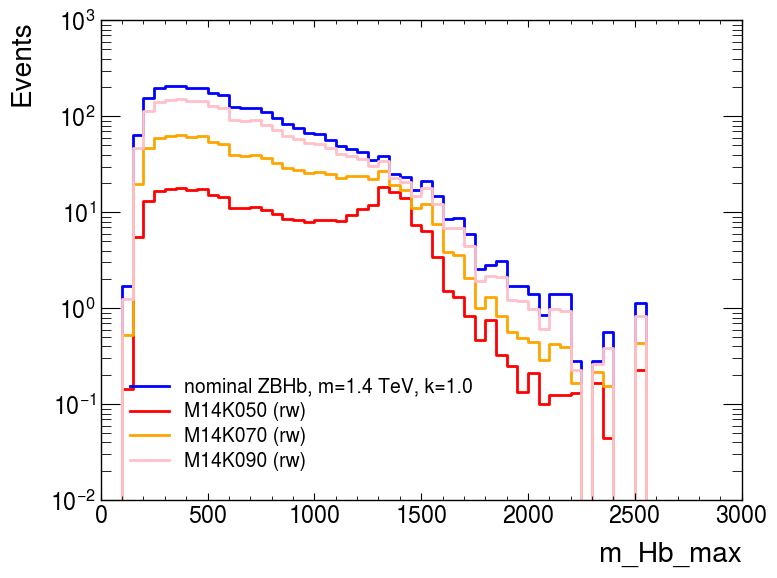

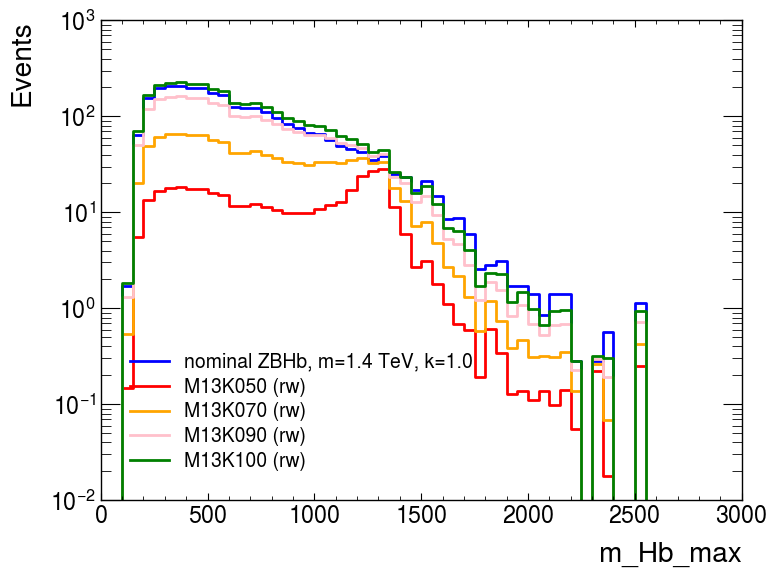

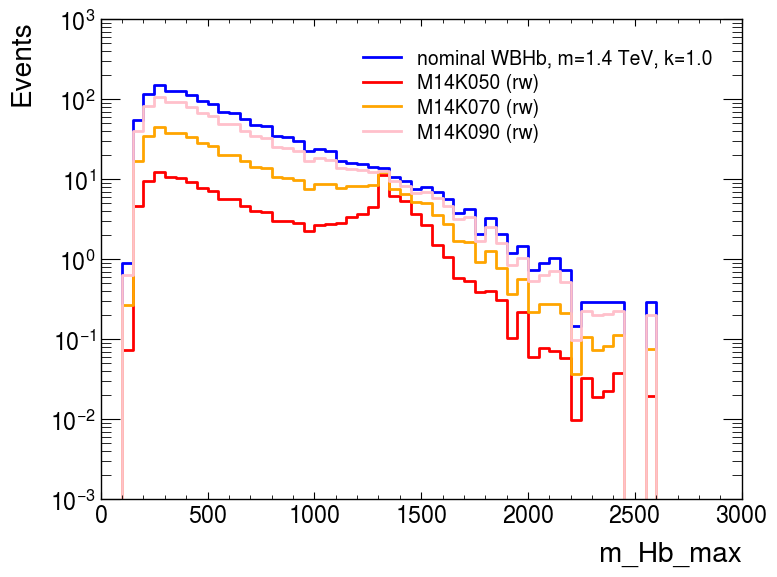

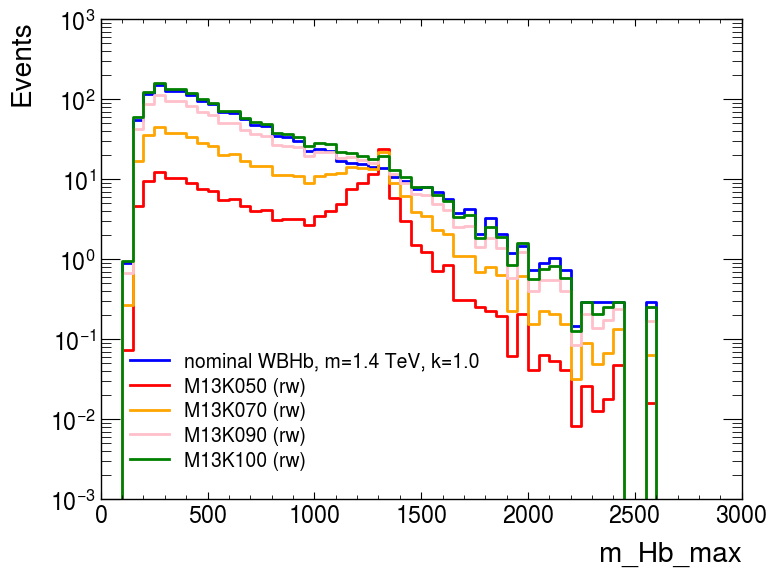

In [11]:
input_files = ['data/108005.root', 'data/108021.root']
nominal_labels = [p + ', m=1.4 TeV, k=1.0' for p in ['ZBHb', 'WBHb']]
weights_coupling = {
    'M14K050': 'red',
    'M14K070': 'orange',
    'M14K090': 'pink',
}
weights_mass = {
    'M13K050': 'red',
    'M13K070': 'orange',
    'M13K090': 'pink',
    'M13K100': 'green',
}
for input_file, nominal_label in zip(input_files, nominal_labels):
    for weights in [weights_coupling, weights_mass]:
        fig, ax = plotDistribution(input_file, weights, nominal_label=nominal_label, logy=True)

## mVLQ = 1.6 TeV mass point

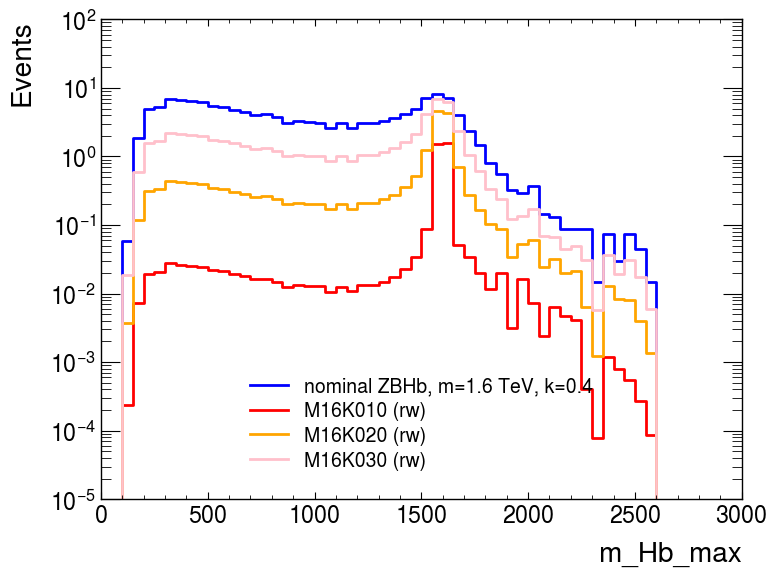

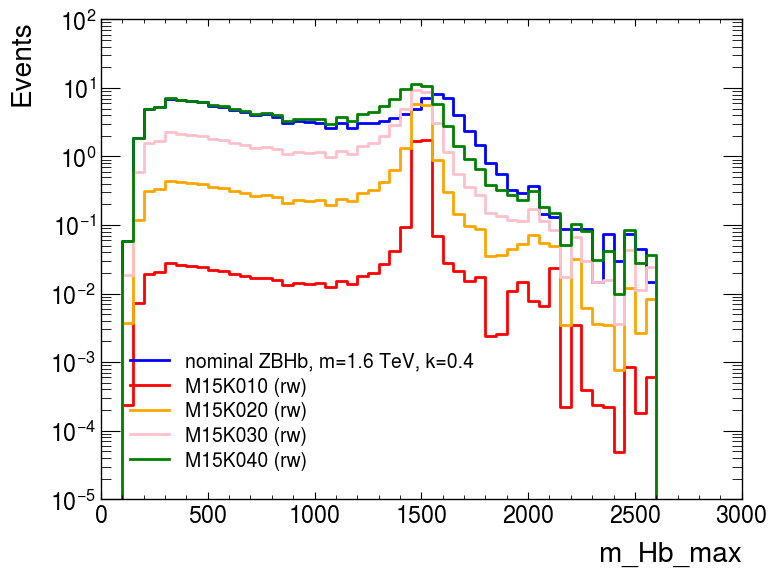

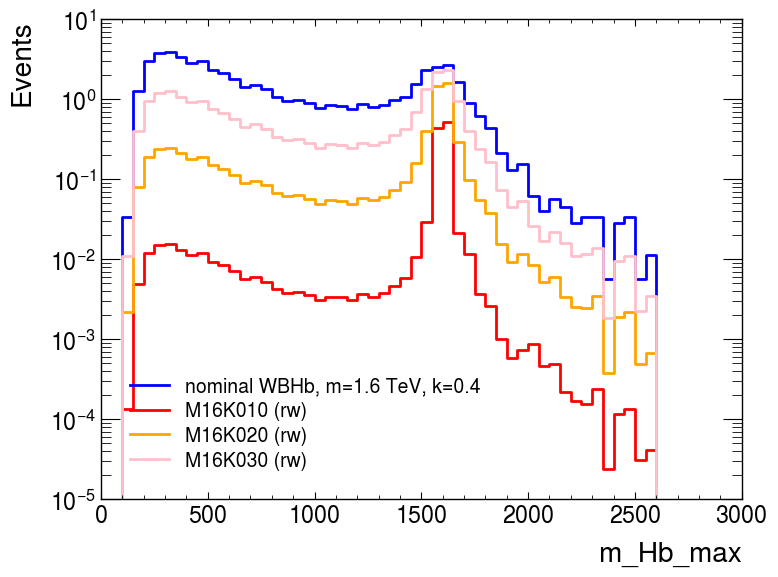

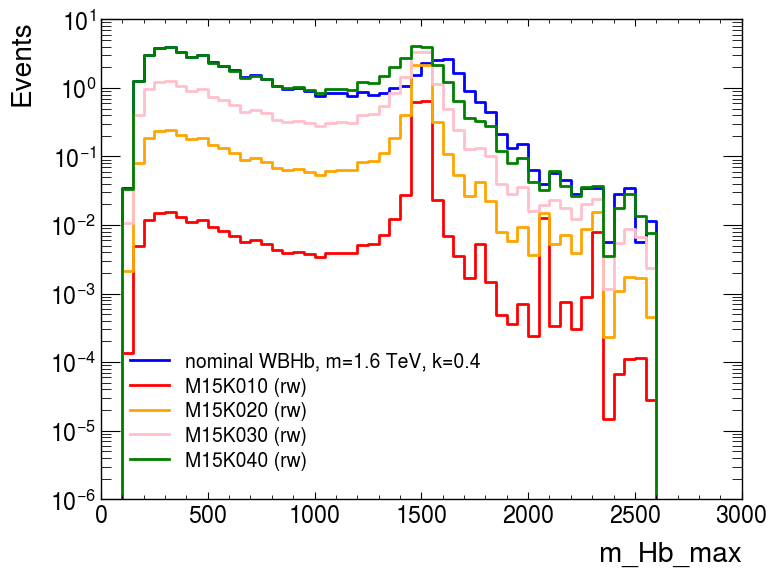

In [12]:
input_files = ['data/108006.root', 'data/108022.root']
nominal_labels = [p + ', m=1.6 TeV, k=0.4' for p in ['ZBHb', 'WBHb']]
weights_coupling = {
    'M16K010': 'red',
    'M16K020': 'orange',
    'M16K030': 'pink',
}
weights_mass = {
    'M15K010': 'red',
    'M15K020': 'orange',
    'M15K030': 'pink',
    'M15K040': 'green',
}
for input_file, nominal_label in zip(input_files, nominal_labels):
    for weights in [weights_coupling, weights_mass]:
        fig, ax = plotDistribution(input_file, weights, nominal_label=nominal_label, logy=True)

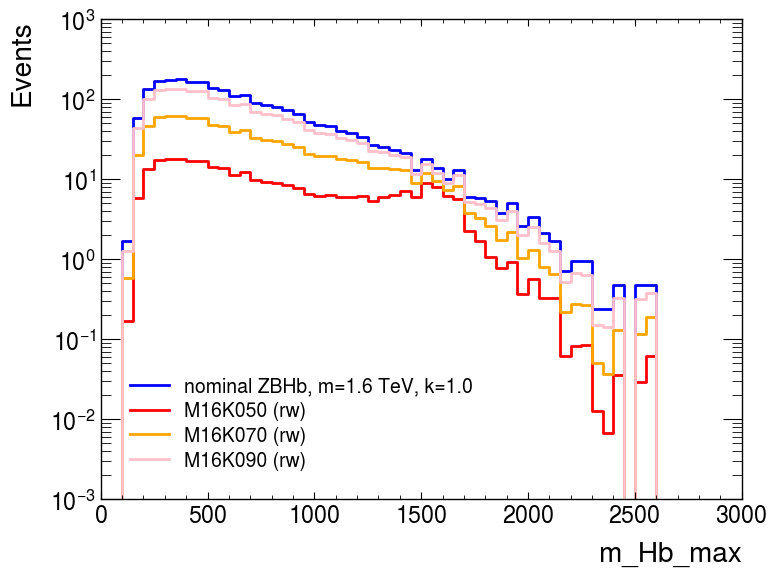

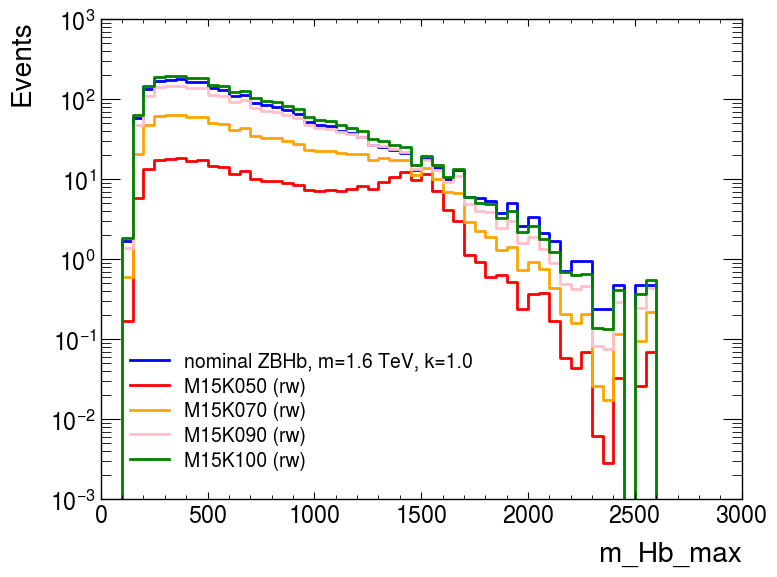

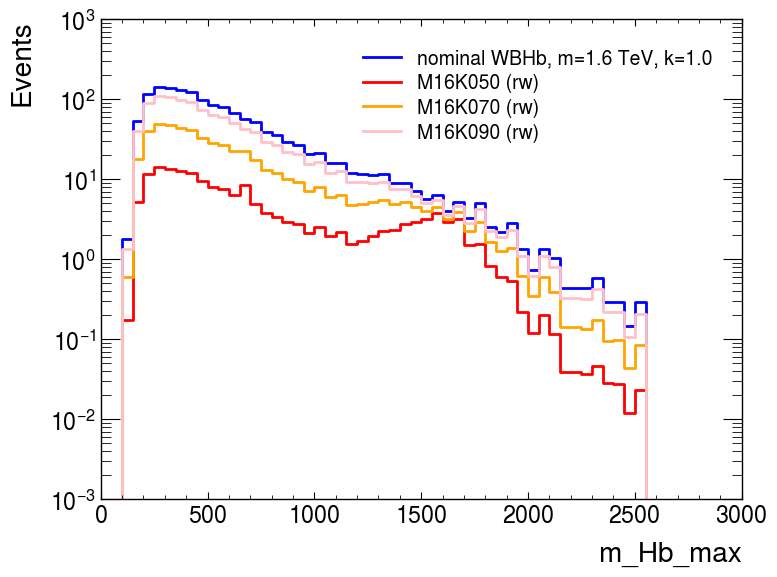

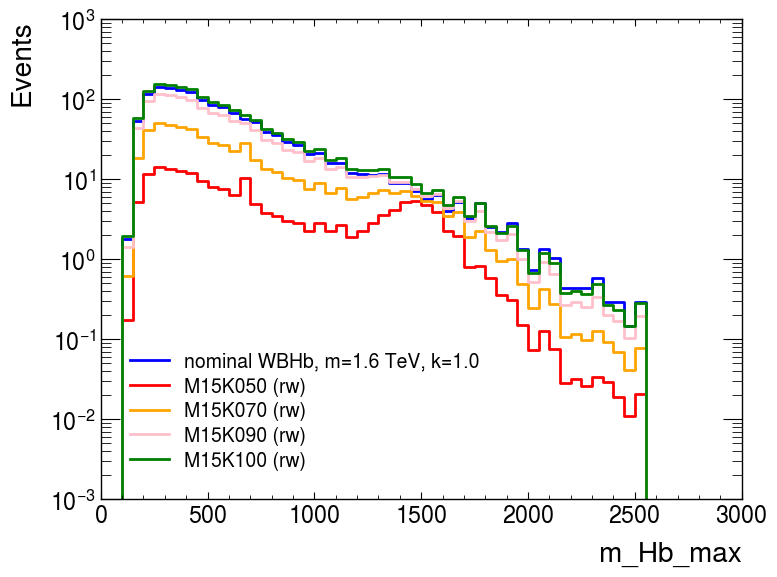

In [13]:
input_files = ['data/108007.root', 'data/108023.root']
nominal_labels = [p + ', m=1.6 TeV, k=1.0' for p in ['ZBHb', 'WBHb']]
weights_coupling = {
    'M16K050': 'red',
    'M16K070': 'orange',
    'M16K090': 'pink',
}
weights_mass = {
    'M15K050': 'red',
    'M15K070': 'orange',
    'M15K090': 'pink',
    'M15K100': 'green',
}
for input_file, nominal_label in zip(input_files, nominal_labels):
    for weights in [weights_coupling, weights_mass]:
        fig, ax = plotDistribution(input_file, weights, nominal_label=nominal_label, logy=True)

## mVLQ = 1.8 mass point

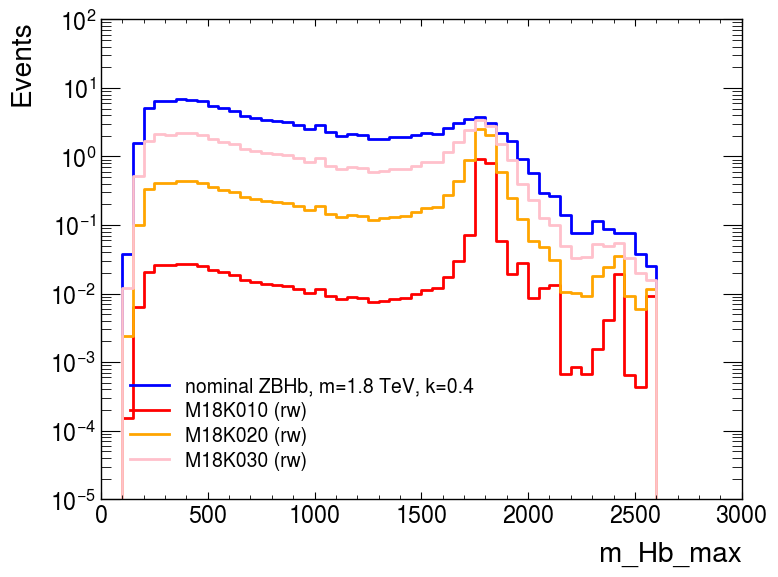

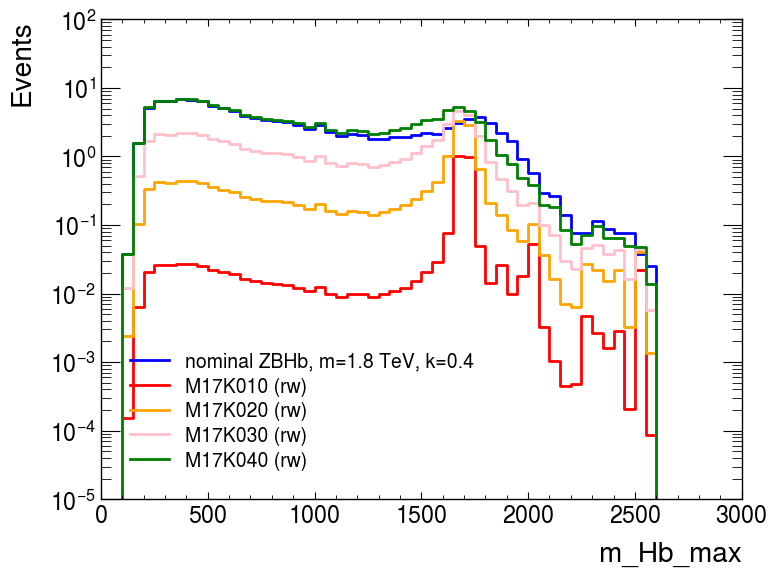

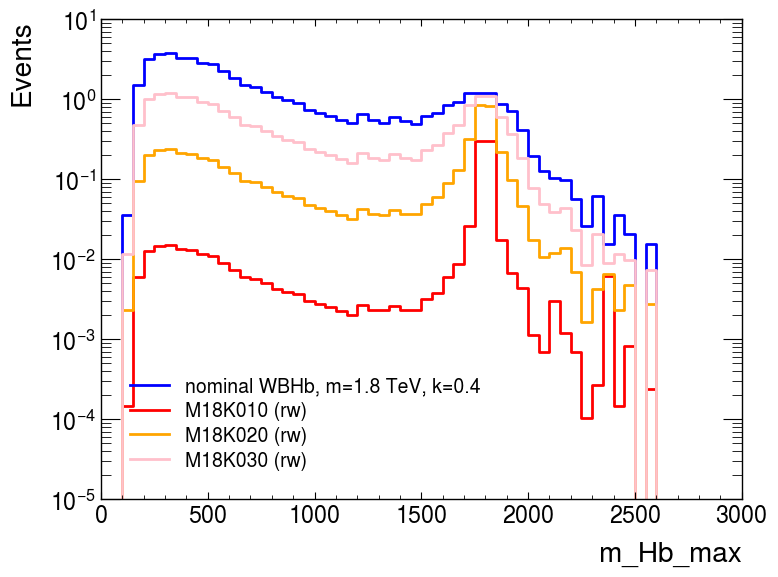

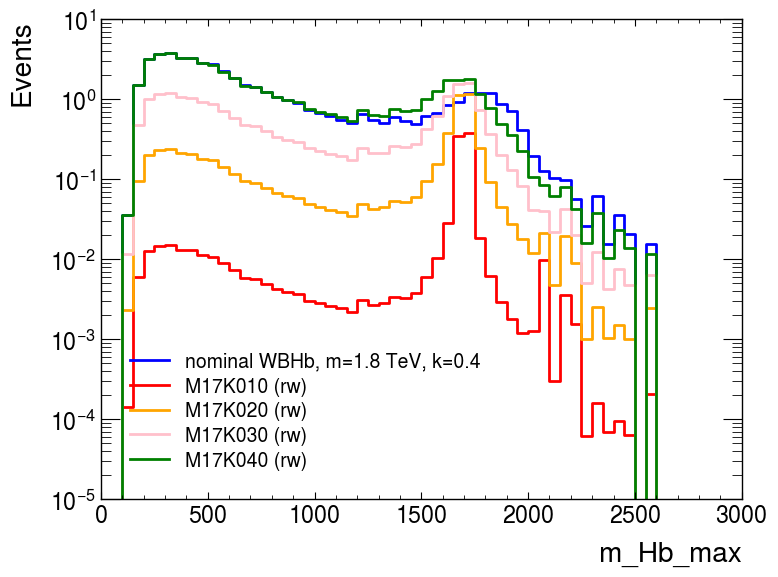

In [14]:
input_files = ['data/108008.root', 'data/108024.root']
nominal_labels = [p + ', m=1.8 TeV, k=0.4' for p in ['ZBHb', 'WBHb']]
weights_coupling = {
    'M18K010': 'red',
    'M18K020': 'orange',
    'M18K030': 'pink',
}
weights_mass = {
    'M17K010': 'red',
    'M17K020': 'orange',
    'M17K030': 'pink',
    'M17K040': 'green',
}
for input_file, nominal_label in zip(input_files, nominal_labels):
    for weights in [weights_coupling, weights_mass]:
        fig, ax = plotDistribution(input_file, weights, nominal_label=nominal_label, logy=True)

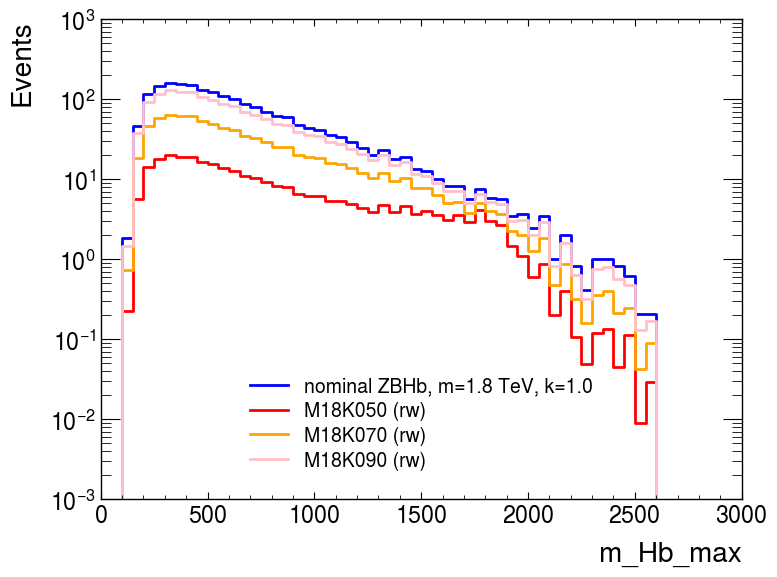

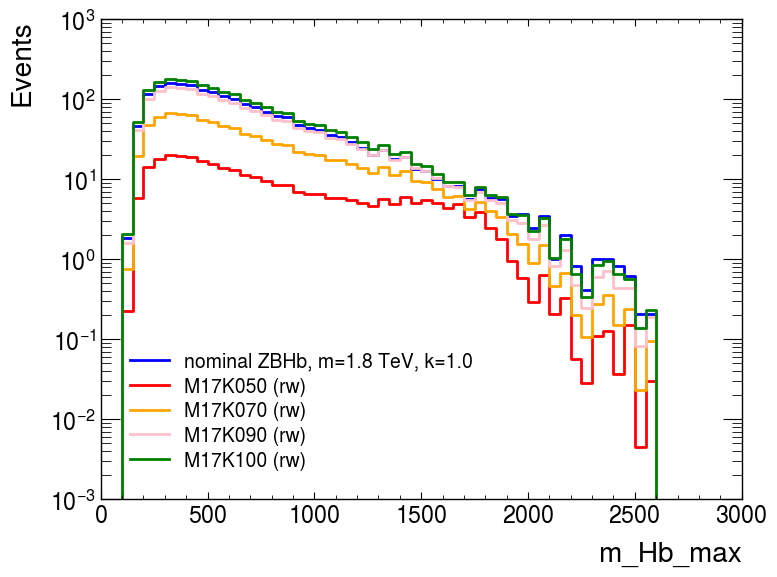

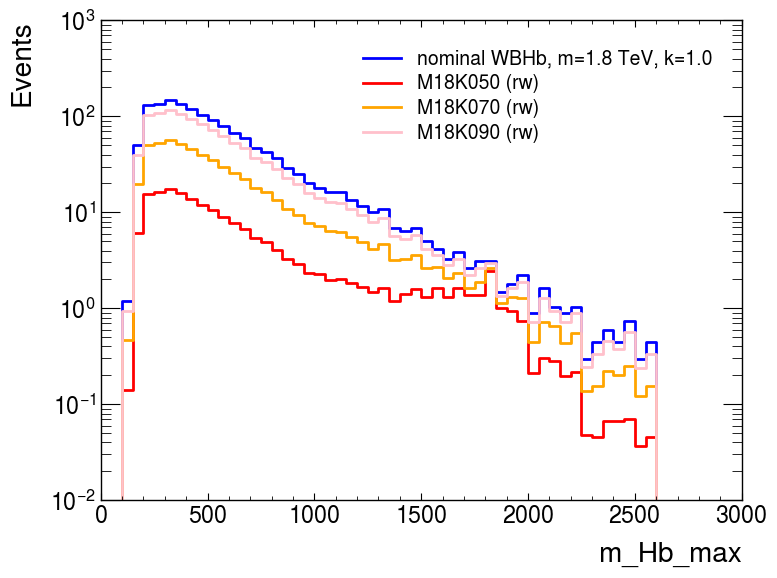

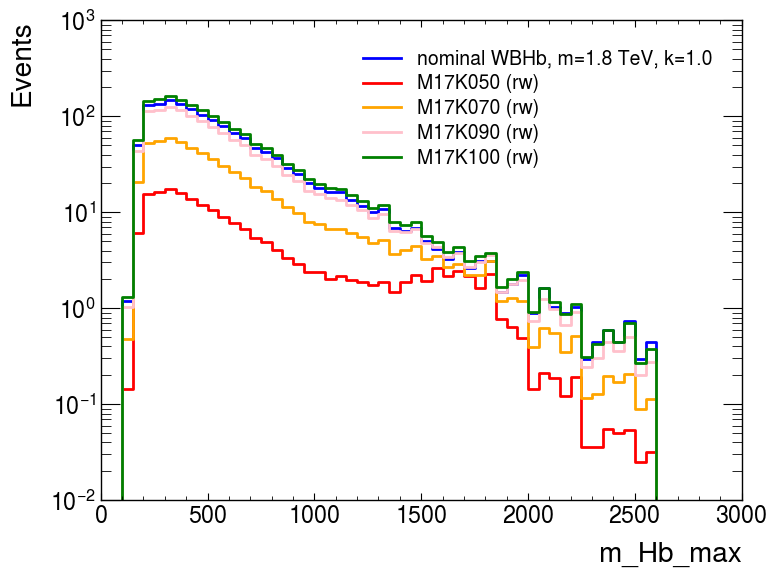

In [15]:
input_files = ['data/108009.root', 'data/108025.root']
nominal_labels = [p + ', m=1.8 TeV, k=1.0' for p in ['ZBHb', 'WBHb']]
weights_coupling = {
    'M18K050': 'red',
    'M18K070': 'orange',
    'M18K090': 'pink',
}
weights_mass = {
    'M17K050': 'red',
    'M17K070': 'orange',
    'M17K090': 'pink',
    'M17K100': 'green',
}
for input_file, nominal_label in zip(input_files, nominal_labels):
    for weights in [weights_coupling, weights_mass]:
        fig, ax = plotDistribution(input_file, weights, nominal_label=nominal_label, logy=True)

## mVLQ = 2.0 mass point

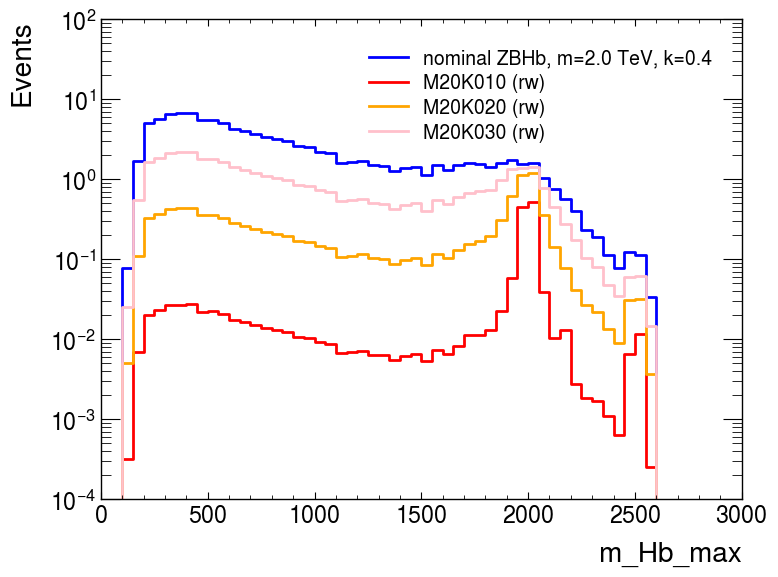

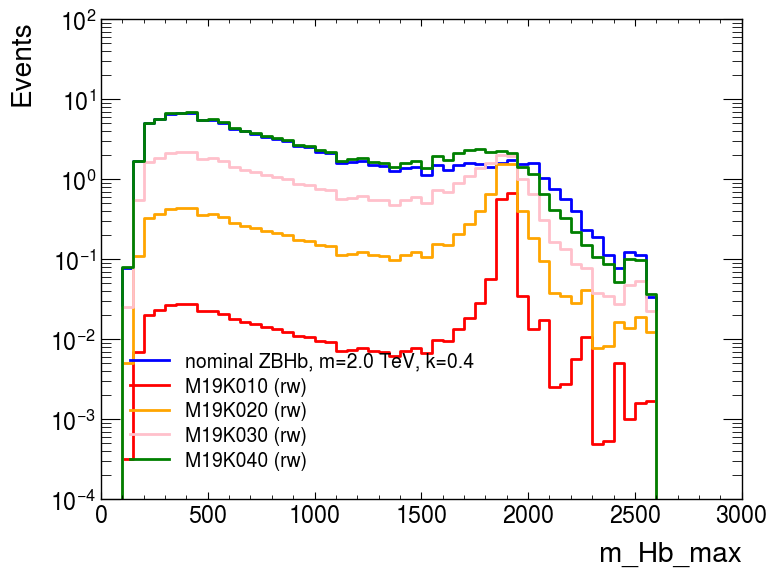

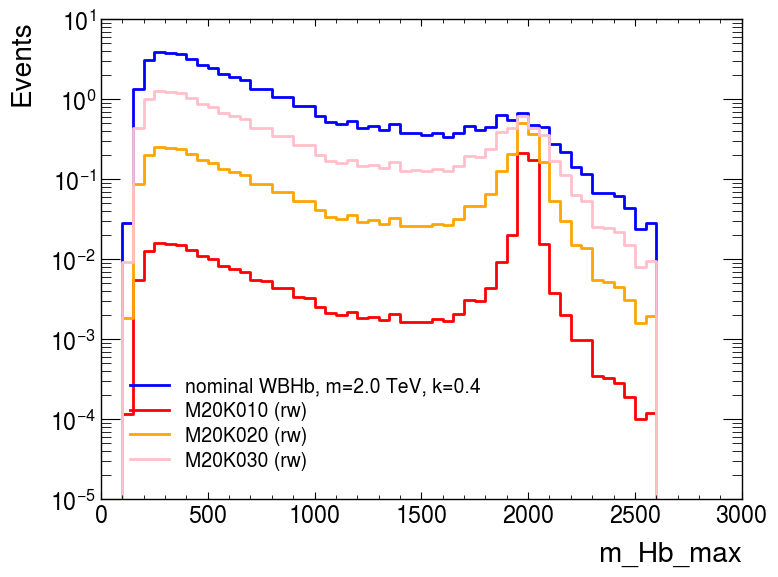

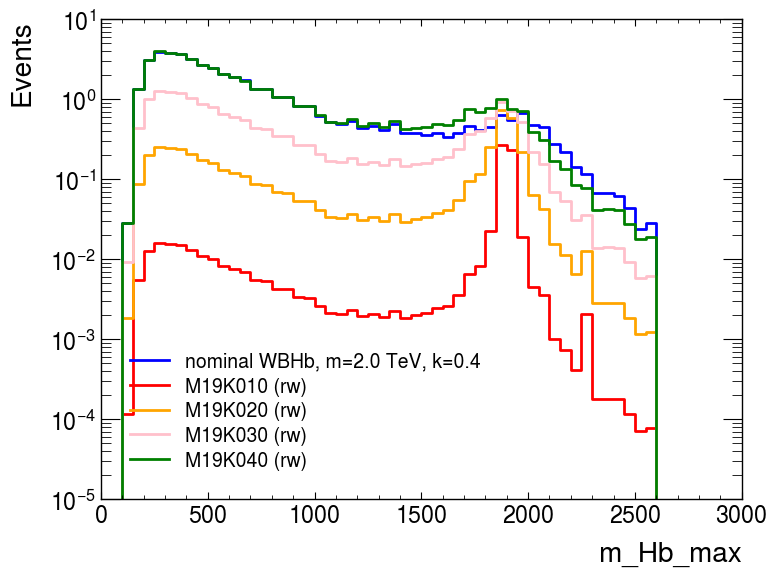

In [16]:
input_files = ['data/108010.root', 'data/108026.root']
nominal_labels = [p + ', m=2.0 TeV, k=0.4' for p in ['ZBHb', 'WBHb']]
weights_coupling = {
    'M20K010': 'red',
    'M20K020': 'orange',
    'M20K030': 'pink',
}
weights_mass = {
    'M19K010': 'red',
    'M19K020': 'orange',
    'M19K030': 'pink',
    'M19K040': 'green',
}
for input_file, nominal_label in zip(input_files, nominal_labels):
    for weights in [weights_coupling, weights_mass]:
        fig, ax = plotDistribution(input_file, weights, nominal_label=nominal_label, logy=True)

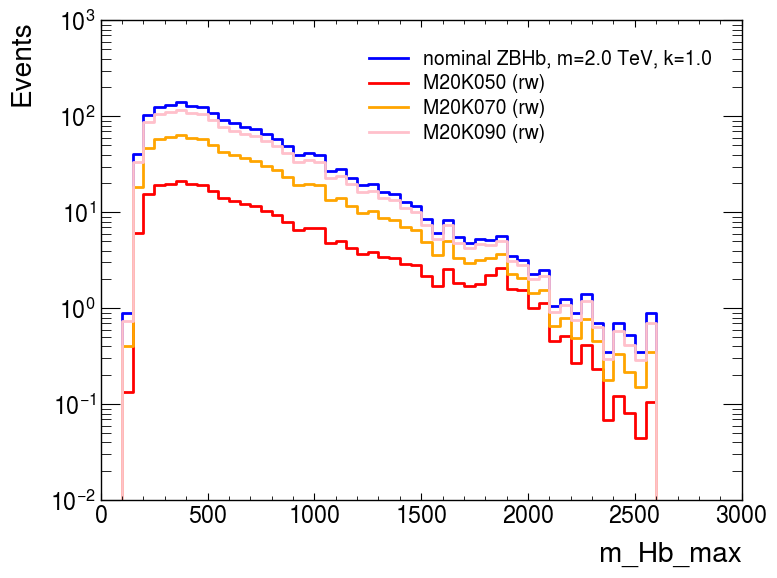

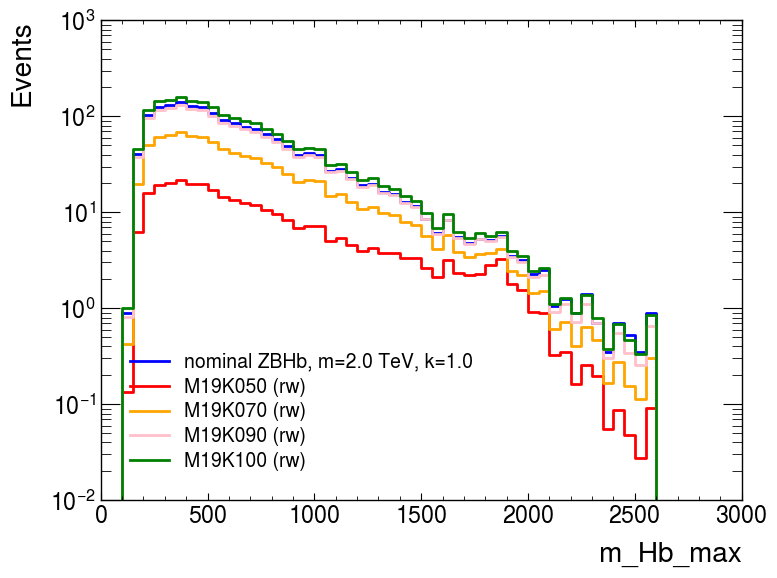

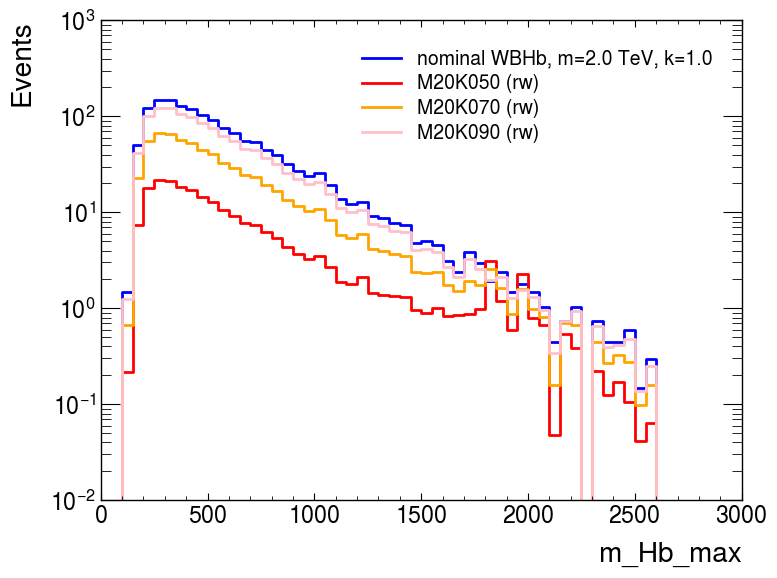

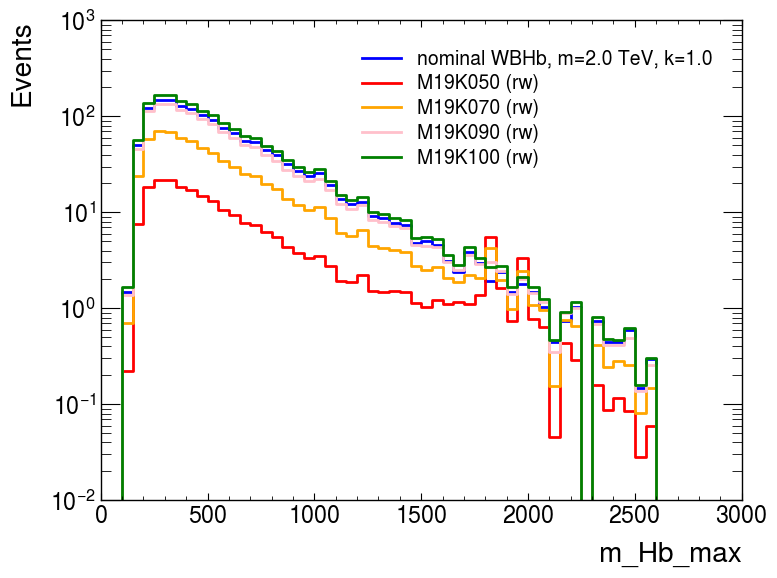

In [17]:
input_files = ['data/108011.root', 'data/108027.root']
nominal_labels = [p + ', m=2.0 TeV, k=1.0' for p in ['ZBHb', 'WBHb']]
weights_coupling = {
    'M20K050': 'red',
    'M20K070': 'orange',
    'M20K090': 'pink',
}
weights_mass = {
    'M19K050': 'red',
    'M19K070': 'orange',
    'M19K090': 'pink',
    'M19K100': 'green',
}
for input_file, nominal_label in zip(input_files, nominal_labels):
    for weights in [weights_coupling, weights_mass]:
        fig, ax = plotDistribution(input_file, weights, nominal_label=nominal_label, logy=True)

## mVLQ = 2.2 mass point

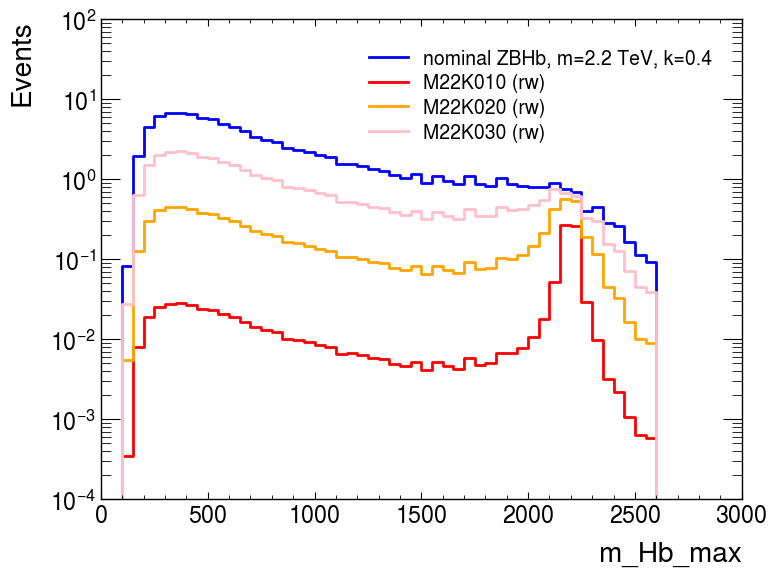

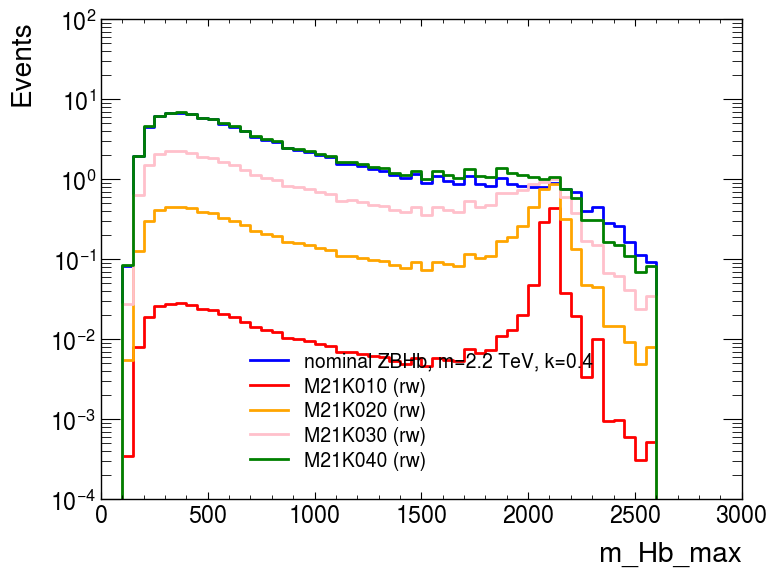

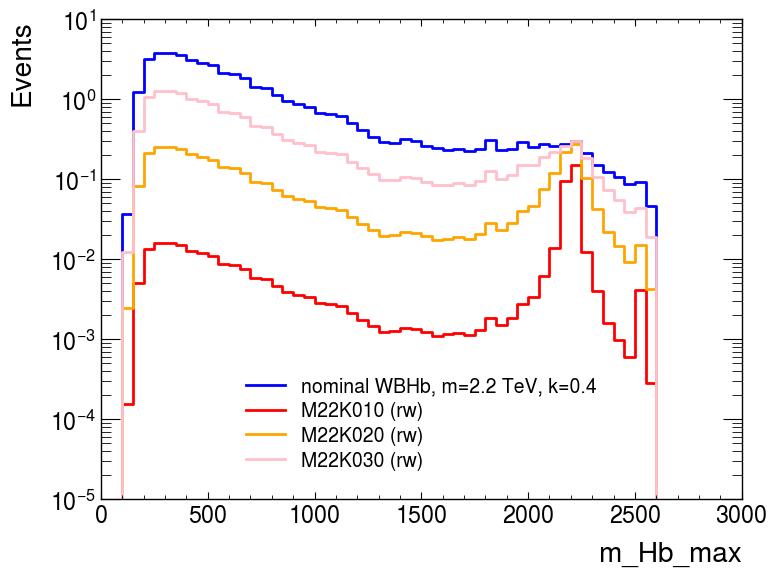

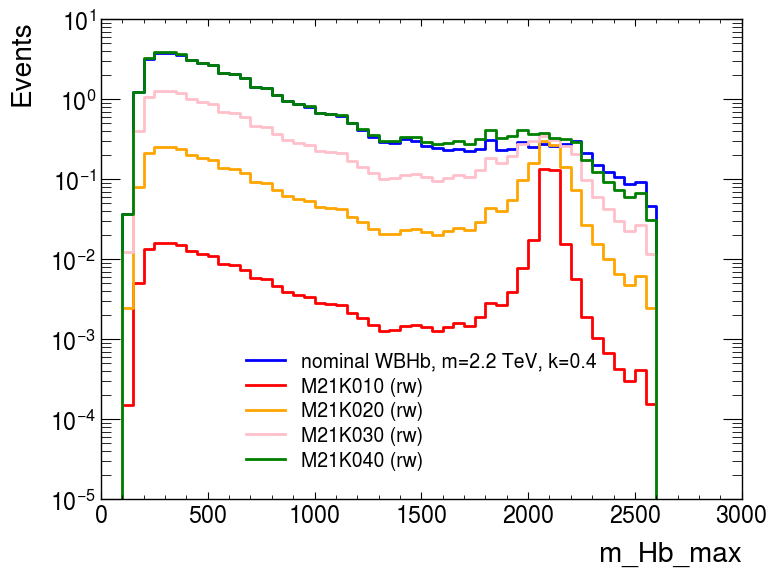

In [18]:
input_files = ['data/108012.root', 'data/108028.root']
nominal_labels = [p + ', m=2.2 TeV, k=0.4' for p in ['ZBHb', 'WBHb']]
weights_coupling = {
    'M22K010': 'red',
    'M22K020': 'orange',
    'M22K030': 'pink',
}
weights_mass = {
    'M21K010': 'red',
    'M21K020': 'orange',
    'M21K030': 'pink',
    'M21K040': 'green',
}
for input_file, nominal_label in zip(input_files, nominal_labels):
    for weights in [weights_coupling, weights_mass]:
        fig, ax = plotDistribution(input_file, weights, nominal_label=nominal_label, logy=True)

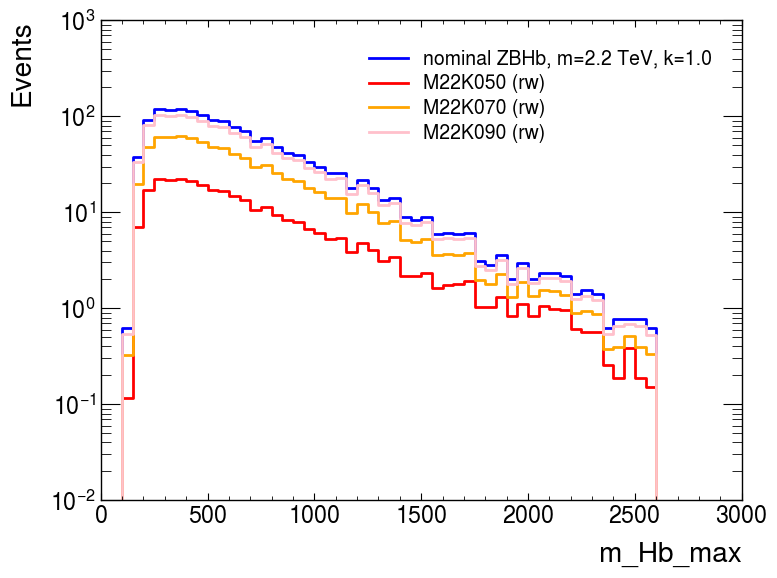

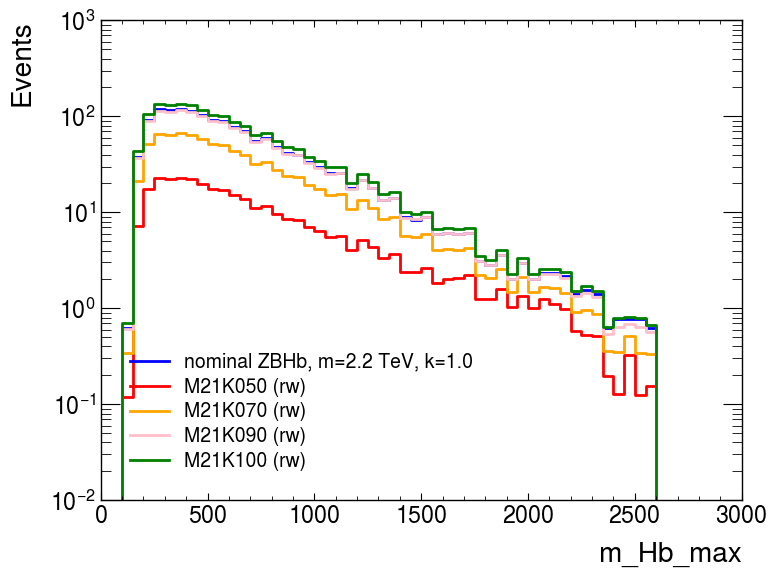

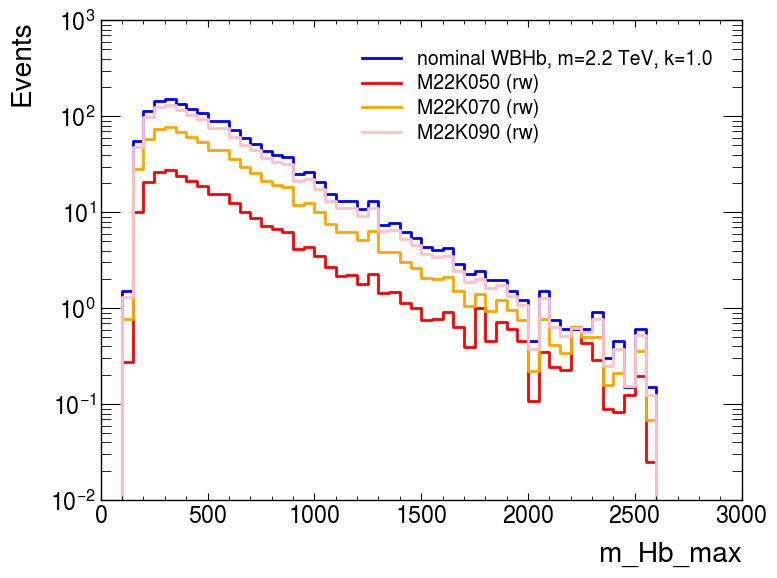

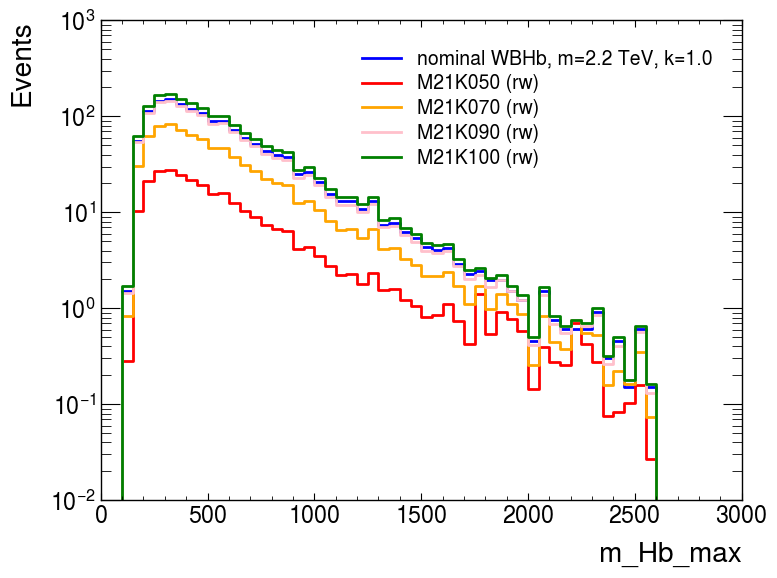

In [19]:
input_files = ['data/108013.root', 'data/108029.root']
nominal_labels = [p + ', m=2.2 TeV, k=1.0' for p in ['ZBHb', 'WBHb']]
weights_coupling = {
    'M22K050': 'red',
    'M22K070': 'orange',
    'M22K090': 'pink',
}
weights_mass = {
    'M21K050': 'red',
    'M21K070': 'orange',
    'M21K090': 'pink',
    'M21K100': 'green',
}
for input_file, nominal_label in zip(input_files, nominal_labels):
    for weights in [weights_coupling, weights_mass]:
        fig, ax = plotDistribution(input_file, weights, nominal_label=nominal_label, logy=True)

## mVLQ = 2.4 mass point

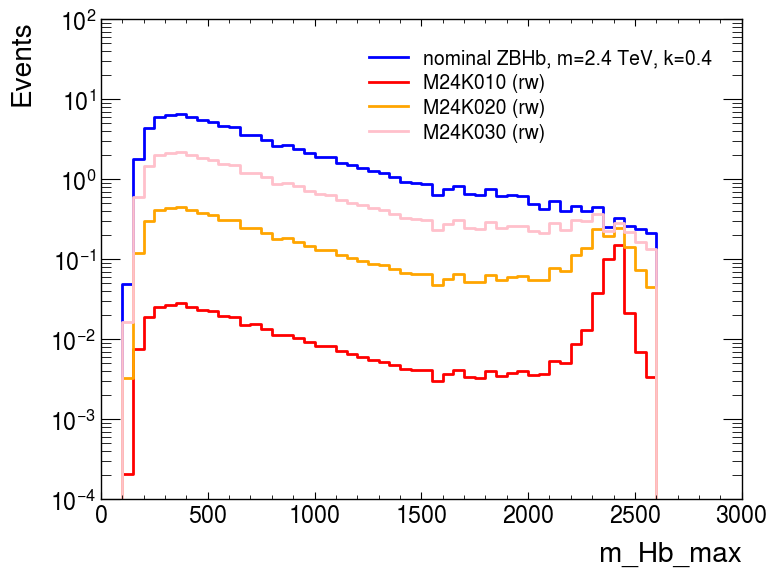

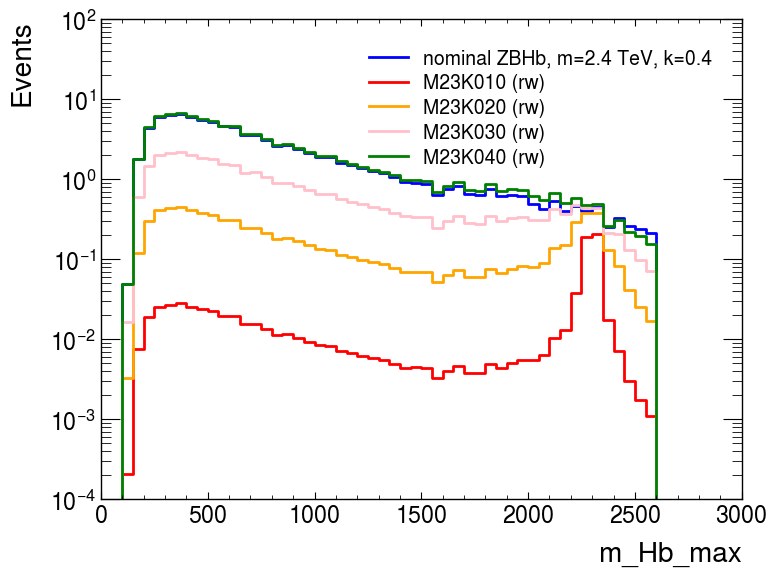

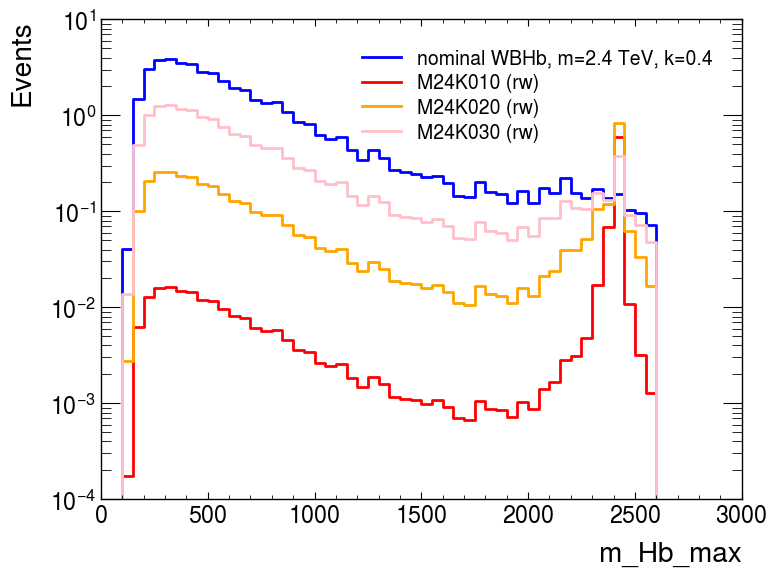

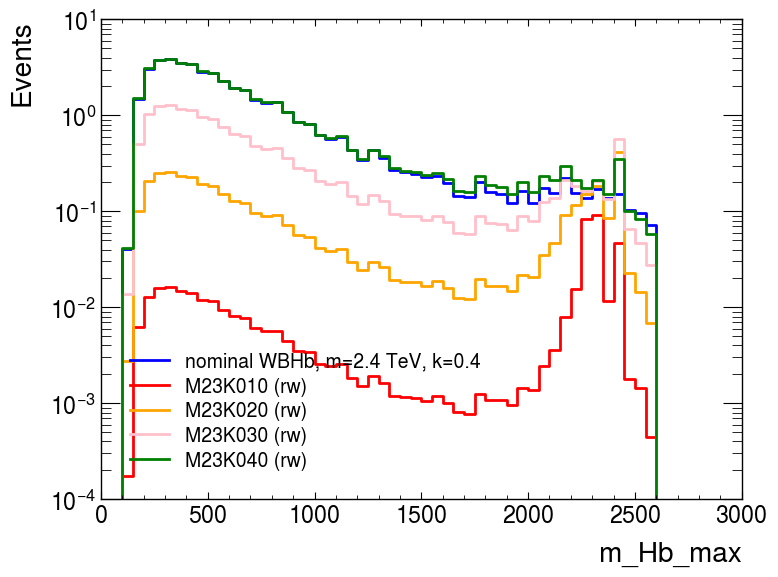

In [20]:
input_files = ['data/108014.root', 'data/108030.root']
nominal_labels = [p + ', m=2.4 TeV, k=0.4' for p in ['ZBHb', 'WBHb']]
weights_coupling = {
    'M24K010': 'red',
    'M24K020': 'orange',
    'M24K030': 'pink',
}
weights_mass = {
    'M23K010': 'red',
    'M23K020': 'orange',
    'M23K030': 'pink',
    'M23K040': 'green',
}
for input_file, nominal_label in zip(input_files, nominal_labels):
    for weights in [weights_coupling, weights_mass]:
        fig, ax = plotDistribution(input_file, weights, nominal_label=nominal_label, logy=True)

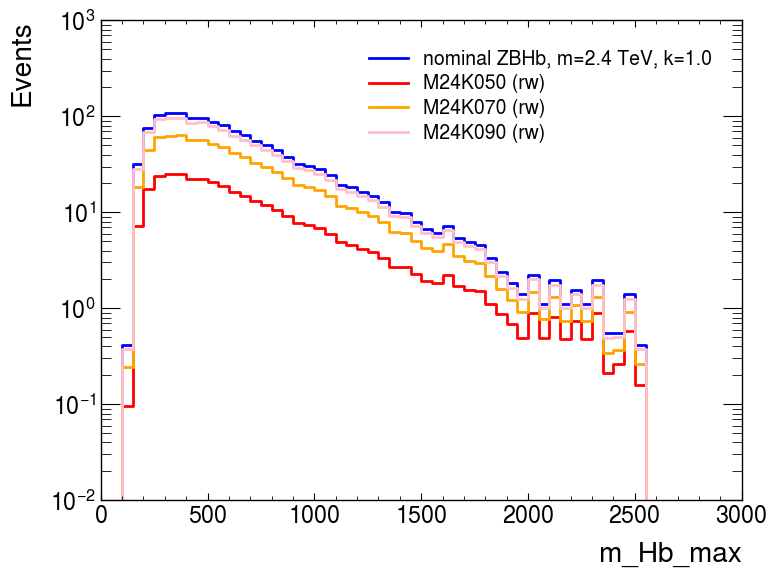

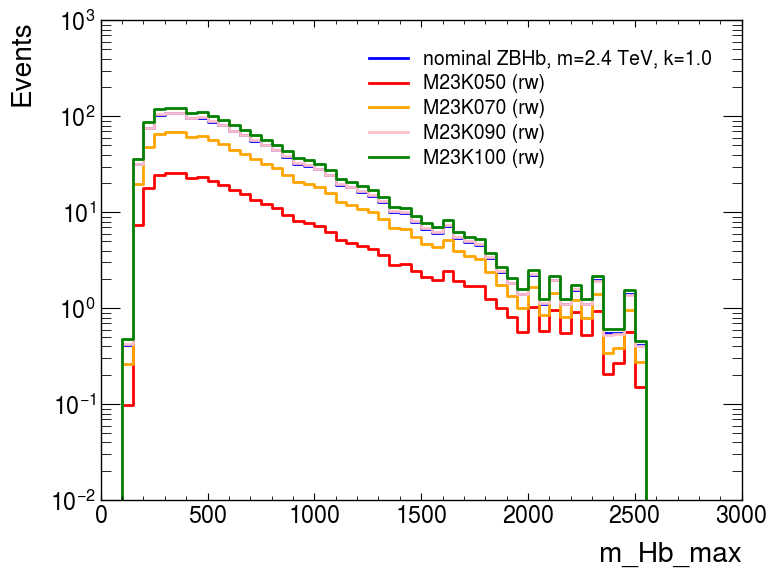

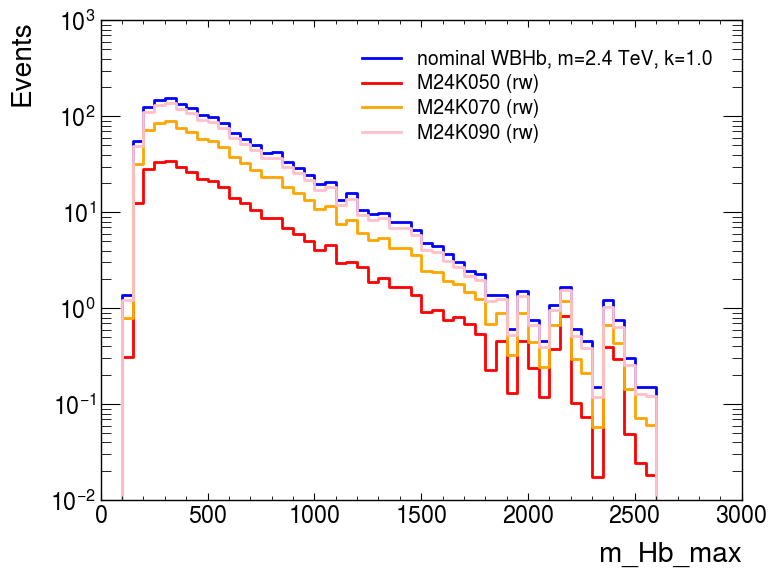

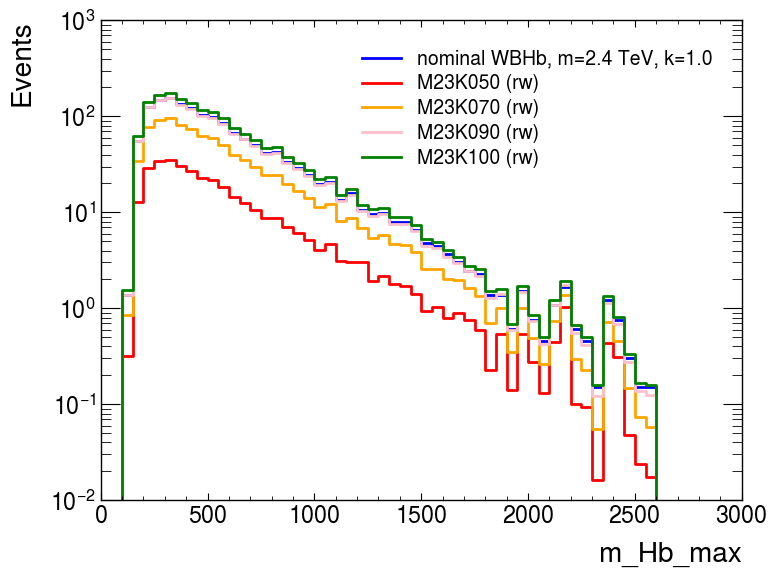

In [21]:
input_files = ['data/108015.root', 'data/108031.root']
nominal_labels = [p + ', m=2.4 TeV, k=1.0' for p in ['ZBHb', 'WBHb']]
weights_coupling = {
    'M24K050': 'red',
    'M24K070': 'orange',
    'M24K090': 'pink',
}
weights_mass = {
    'M23K050': 'red',
    'M23K070': 'orange',
    'M23K090': 'pink',
    'M23K100': 'green',
}
for input_file, nominal_label in zip(input_files, nominal_labels):
    for weights in [weights_coupling, weights_mass]:
        fig, ax = plotDistribution(input_file, weights, nominal_label=nominal_label, logy=True)